In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# some useful functions
def get_birdcounts(ebd_data):
	# read ebird count and name data
	bird_counts = {}

	science_name = list(ebd_data['SCIENTIFIC NAME'])

	i=0
	for bird_name in science_name:
		if bird_name in bird_counts.keys():
			bird_counts[bird_name] +=1
		else:
			bird_counts[bird_name] = 1

		i+=1

	return bird_counts

def get_basiclevel(zapotec_data):
	bird_sci2basic_names = {}

	basic_name = list(zapotec_data['folk_generic'])
	science_name = list(zapotec_data['species'])

	i=0
	for bird_name in science_name:
		bird_sci2basic_names[bird_name] = basic_name[i]
		i+=1

	return bird_sci2basic_names

In [7]:
# load ebird data
ebd_data = pd.read_csv('./data/ebird_MX-OAX_cogsci_clean.csv')
# get bird counts, index by species name
bird_counts = get_birdcounts(ebd_data)


In [8]:
df = pd.read_csv('./data/df_zapotec.csv')
df.head()

,species,length,mass,freq,folk_generic,folk_specific,clements_group,prototype
0,Catherpes mexicanus,5.00,11.97,2327,nguzhǐn,nguzhǐn-zhàn̲-quiè,Wrens,0
1,Cynanthus sordidus,3.75,4.00,4751,dzǐn̲g,dzǐn̲g,Hummingbirds,0
2,Buteo brachyurus,16.00,496.01,1314,msì,msì,"Vultures, Hawks, and Allies",0
3,Accipiter cooperii,17.50,429.67,1551,msì,msì-lâg,"Vultures, Hawks, and Allies",0
4,Caracara plancus,49.50,1078.62,0,mguîn̲-rlæ̌-dzìt,mguîn̲-rlæ̌-dzìt,Falcons and Caracaras,0


## What species are given a name?

Text(0, 0.5, 'Log frequency of occurence')

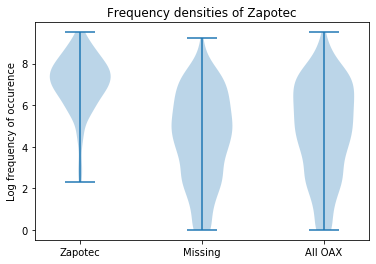

In [9]:
# violin plot (with log frequency of occurrence)

bird_list = list(df['species']) 
freqs = list(df['freq'])

data_zapotec = [np.log(i) for i in freqs if i >0]
data_all = [np.log(i) for i in bird_counts.values()]

missing_data = []
for birdcount in bird_counts.keys():
	if birdcount not in bird_list:
		missing_data.append(np.log(bird_counts[birdcount]))

pos = [1,2,3]
plotnames = ('Zapotec','Missing','All OAX')
plt.figure()
plt.violinplot([data_zapotec,missing_data,data_all],pos) 
plt.title('Frequency densities of Zapotec')
plt.xticks(pos,plotnames)
plt.ylabel('Log frequency of occurence')

Text(0, 0.5, 'Log mass')

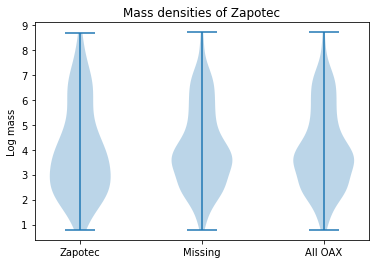

In [10]:
# make the same plot but with bird masses
def get_birdmass(bird_name,bird_mass_df):
	try:
		mass = float(bird_mass_df['BodyMass-Value'][bird_mass_df['Scientific'] == bird_name]) 
	except:
		mass = 0
	return mass

bigbirddata_data = pd.read_csv('./data/BirdFuncDat.txt',sep='\t',encoding = "ISO-8859-1")
bird_mass_df = bigbirddata_data[['BodyMass-Value','Scientific']]


basic_levels = get_basiclevel(df)


zapotec_masses = {}
for zapotec_bird in basic_levels.keys():
	mass = get_birdmass(zapotec_bird,bird_mass_df)
	if mass > 0:
		zapotec_masses[zapotec_bird] = mass

oax_masses = {}
for oax_bird in bird_counts.keys():
	mass = get_birdmass(oax_bird,bird_mass_df)
	if mass > 0:
		oax_masses[oax_bird] = mass
        
        
data_zapotec = [np.log(i) for i in zapotec_masses.values()]
data_all = [np.log(i) for i in oax_masses.values()]

missing_data = []
for birdmass in oax_masses.keys():
	if birdmass not in zapotec_masses.keys():
		missing_data.append(np.log(oax_masses[birdmass]))

pos = [1,2,3]
plotnames = ('Zapotec','Missing','All OAX')
plt.figure()
plt.violinplot([data_zapotec,missing_data,data_all],pos) 
plt.title('Mass densities of Zapotec')
plt.xticks(pos,plotnames)
plt.ylabel('Log mass')